In [22]:
import numpy as np
import random
import chess
from matplotlib import pyplot as plt
import time
import chess.svg
import pandas as pd

In [23]:
class Individual:
    def __init__(self):
        self.code = self.generateCode()
        self.fitness = self.calcFitness()
    
    def generateCode(self):
        # generate 64 integers - one for each chess position
        c = np.zeros(64)
        for i in range(64):
            #integers will be between 0 and 12, representing an empty square or a piece.
            c[i] = random.randrange(13) 
        return c
    
    # generate a valid chess position with as few pieces as possible
    def calcFitness(self):
        board = self.array_to_board(self.code)
        
        penalty = len(board.piece_map()) * 0.1
        
        if not board.is_valid():
            penalty += 10
        
        return penalty
    
    def array_to_board(self,arr):
        # construct an empty chess board
        board = chess.Board(fen='8/8/8/8/8/8/8/8 w - - 0 1')
        
        for i in range(len(arr)):
            if arr[i] == 0:
                piece = None
            elif arr[i] <= 6:
                # pieces have values 1 through 6
                piece = chess.Piece(arr[i], chess.WHITE)
            else:
                piece = chess.Piece(arr[i]-6, chess.BLACK)
            
            if piece:
                board.set_piece_at(i,piece)
            
        return board


In [24]:
def selection(population, tournament_size):
    
    best_fitness = float('inf')
    index = -1
    
    for i in range(tournament_size):
        random_individual = random.randrange(len(population))
        if population[random_individual].fitness < best_fitness:
            best_fitness = population[random_individual].fitness
            index = random_individual
    
    return index

In [25]:
def crossover(parent1,parent2,child1,child2,crossover_prob):
    
    if crossover_prob > random.random():
        breakpoint = random.randrange(64)

        child1.code[:breakpoint] = parent1.code[:breakpoint]
        child2.code[:breakpoint] = parent2.code[:breakpoint]

        child1.code[breakpoint:] = parent2.code[breakpoint:]
        child2.code[breakpoint:] = parent1.code[breakpoint:]
    else:
        child1 = parent1
        child2 = parent2

In [26]:
def mutation(individual,mutation_prob):
    for i in range(64):
        if random.random() < mutation_prob:
            diff = random.randrange(13)
            while individual.code[i] == diff:
                diff = random.randrange(13)
            
            individual.code[i] = diff      

In [27]:
def ga(population_size,num_iters,tournament_size,crossover_prob,mutation_prob,elitism_size,max_iters_without_improv):
    
    population = [Individual() for _ in range(population_size)]
    new_population = [Individual() for _ in range(population_size)]
    
    best_individuals = []
    
    population.sort(key= lambda a: a.fitness)
    best_individual_before = population[0]
    counter = 0
    
    for j in range(num_iters):
        
        #elitism
        new_population[:elitism_size] = population[:elitism_size]
        
        for i in range(elitism_size,population_size,2):
            
            parent1 = selection(population,tournament_size)
            parent2 = selection(population,tournament_size)
            
            crossover(population[parent1],population[parent2], new_population[i], new_population[i+1],crossover_prob)
            
            mutation(new_population[i],mutation_prob)
            mutation(new_population[i+1],mutation_prob)
            
            new_population[i].fitness = new_population[i].calcFitness()
            new_population[i+1].fitness = new_population[i+1].calcFitness()
            
        population = new_population
        
        population.sort(key= lambda a: a.fitness)
        best_individual = population[0]
        if best_individual.fitness == best_individual_before.fitness:
            counter+=1
        else:  
            counter=0
        
        best_individual_before = best_individual
        best_individuals.append(best_individual_before.fitness)
            
        if max_iters_without_improv <= counter:
            print("No more impovement!")
            break

    #population.sort(key= lambda a: a.fitness)
    #best_individual = population[0]
    print("The best soulution found:")
    print(best_individual.code)
    print("Objective function:")
    print(best_individual.fitness)

    plt.plot(range(j+1),best_individuals)
    
    return best_individual

No more impovement!
The best soulution found:
[ 0.  0.  0.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 12.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Objective function:
0.30000000000000004
Time:
2.5911073684692383
FEN:
8/K7/8/3k4/8/8/8/3b4 w - - 0 1


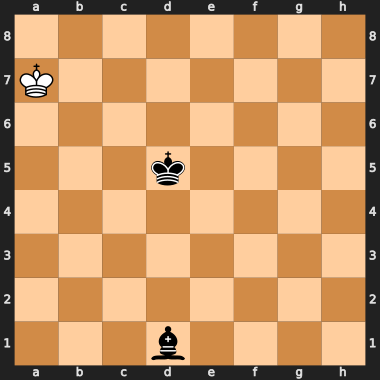

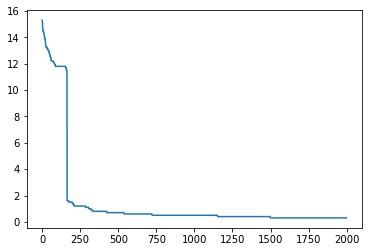

In [29]:
st = time.time()
best_board = ga(20,2000,5,0.9,0.05,2,500)
et = time.time()
print("Time:")
print(et-st)
board = best_board.array_to_board(best_board.code)
print("FEN:")
print(board.fen())
chess.svg.board(board, size = 380)
